In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import numpy as np
import cv2
import os
import pandas as pd
import csv
import sklearn
import glob
from sklearn.model_selection import cross_val_score
import random 
import matplotlib.pyplot as plt
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/images/train.csv
/kaggle/input/images/IMG/f_70.jpeg
/kaggle/input/images/IMG/l_35.jpeg
/kaggle/input/images/IMG/l_11.jpeg
/kaggle/input/images/IMG/v_32.jpeg
/kaggle/input/images/IMG/a_5.jpeg
/kaggle/input/images/IMG/f_6.jpeg
/kaggle/input/images/IMG/f_61.jpeg
/kaggle/input/images/IMG/a_9.jpeg
/kaggle/input/images/IMG/l_110.jpeg
/kaggle/input/images/IMG/d_98.jpeg
/kaggle/input/images/IMG/d_68.jpeg
/kaggle/input/images/IMG/l_70.jpeg
/kaggle/input/images/IMG/d_55.jpeg
/kaggle/input/images/IMG/v_9.jpeg
/kaggle/input/images/IMG/d_40.jpeg
/kaggle/input/images/IMG/d_48.jpeg
/kaggle/input/images/IMG/d_54.jpeg
/kaggle/input/images/IMG/f_79.jpeg
/kaggle/input/images/IMG/d_36.jpeg
/kaggle/input/images/IMG/v_51.jpeg
/kaggle/input/images/IMG/l_29.jpeg
/kaggle/input/images/IMG/d_111.jpeg
/kaggle/input/images/IMG/v_59.jpeg
/kaggle/input/images/IMG/v_37.jpeg
/kaggle/input/images/IMG/f_10.jpeg
/kaggle/input/images/IMG/f_32.jpeg
/kaggle/input/images/IMG/v_67.jpeg
/kaggle/input/images/IMG/l

In [2]:
lines = []
image_path = '../input/images/IMG/'

In [3]:
with open('../input/images/train.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

In [4]:
from PIL import Image

images = []
labels = []

height = 240
width = 256
newsize = (200, 200)
dim = (width, height)

for line in lines:
    source_path = line[0]
    filename = source_path.split('/')[-1]
    current_path = '../input/images/IMG/' + filename
    image = cv2.imread(current_path)
    #image = Image.open(current_path)
    #image = image.resize(newsize)
    #img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    images.append(image)
    label = float(line[1])
    labels.append(label)
X_train = np.array(images)
y_train = np.array(labels)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (240, 256, 3)


In [6]:
print(len(X_train))

336


In [7]:
print(len(y_train))

336


In [8]:
print(len(X_valid))

84


In [9]:
print(len(y_valid)) 

84


In [10]:
print(X_train[0])

[[[231 161  54]
  [231 162  53]
  [233 160  52]
  ...
  [237 212 186]
  [237 212 186]
  [237 212 186]]

 [[233 161  54]
  [233 161  53]
  [234 161  52]
  ...
  [239 214 188]
  [239 214 188]
  [239 214 188]]

 [[234 161  55]
  [234 161  54]
  [234 161  53]
  ...
  [239 215 189]
  [239 215 189]
  [239 215 189]]

 ...

 [[ 73  50  52]
  [ 73  50  52]
  [ 72  50  52]
  ...
  [ 72  51  50]
  [ 72  51  50]
  [ 72  51  50]]

 [[ 72  50  52]
  [ 72  50  52]
  [ 72  50  52]
  ...
  [ 72  51  50]
  [ 72  51  50]
  [ 72  51  50]]

 [[ 72  50  52]
  [ 72  50  52]
  [ 72  50  52]
  ...
  [ 72  51  50]
  [ 72  51  50]
  [ 72  51  50]]]


In [11]:
print(y_train[0])

1.0


3.0


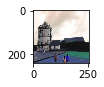

In [12]:
# Displaying a random image from the training dataset
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

In [13]:
# Shuffling the Dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [14]:
def normalization(x_label):
    return x_label / 255 * 0.8 + 0.1

X_train =  normalization(X_train)
X_valid = normalization(X_valid)

In [15]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, ELU, Cropping2D, Dropout, Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPool2D
from keras.models import Model
from keras.layers import BatchNormalization
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [16]:
model = Sequential()
model.add(Convolution2D(24, 5, 5, subsample=(2, 2), activation="elu",  input_shape=(240, 256, 3)))
model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation="elu"))
model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation="elu"))
model.add(Convolution2D(64, 3, 3, activation="elu"))
model.add(Convolution2D(64, 3, 3, activation="elu"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100, activation='elu'))
model.add(Dense(50, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(lr=1.0e-4))
model.summary()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="elu", input_shape=(240, 256,..., strides=(2, 2))`
  


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 118, 126, 24)      1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 61, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 29, 48)        43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 27, 64)        27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 23, 25, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 25, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36800)            

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  


In [17]:
model.compile(loss='mean_squared_error', 
              optimizer=Adam(lr=1.0e-4), 
              metrics=['accuracy'])

In [18]:
history_object = model.fit(X_train, y_train, shuffle=True, nb_epoch=50, validation_data=(X_valid, y_valid))
model.save('model.h5')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 336 samples, validate on 84 samples
Epoch 1/50
336/336 [==============================] - 4s 13ms/step - loss: 2.9206 - accuracy: 0.2440 - val_loss: 1.8316 - val_accuracy: 0.2619
Epoch 2/50
336/336 [==============================] - 1s 2ms/step - loss: 1.4746 - accuracy: 0.2798 - val_loss: 1.4487 - val_accuracy: 0.3452
Epoch 3/50
336/336 [==============================] - 1s 2ms/step - loss: 1.0691 - accuracy: 0.3482 - val_loss: 1.0033 - val_accuracy: 0.4167
Epoch 4/50
336/336 [==============================] - 1s 2ms/step - loss: 0.9216 - accuracy: 0.3869 - val_loss: 1.1945 - val_accuracy: 0.2500
Epoch 5/50
336/336 [==============================] - 1s 2ms/step - loss: 0.7517 - accuracy: 0.4911 - val_loss: 0.7721 - val_accuracy: 0.4048
Epoch 6/50
336/336 [==============================] - 1s 2ms/step - loss: 0.6136 - accuracy: 0.5357 - val_loss: 0.7576 - val_accuracy: 0.3810
Epoch 7/50
336/336 [==============================] - 1s 2ms/step - loss: 0.5374 - accuracy: 0.5685 - 

In [19]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('model.h5')
loaded_model.layers[0].input_shape

(None, 240, 256, 3)

In [91]:
from keras.models import load_model
im = '../input/images/IMG/d_34.jpeg' 
imag = cv2.imread(im)
imag = cv2.resize(imag, dim, interpolation = cv2.INTER_AREA)

In [92]:
model = load_model("model.h5")

In [93]:
imag = np.expand_dims(imag, axis=0)
imag.shape

(1, 240, 256, 3)

In [94]:
imag = imag[None, :, :, :]

In [87]:
pred = model.predict(imag)

In [88]:
print(pred)

[[17.95278]]
